In [1]:
#convert data to csv format

In [177]:
import pandas as pd
 
col_names = ["duration","protocol_type","service","flag","src_bytes",
 
"dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
 
"logged_in","num_compromised","root_shell","su_attempted","num_root",
 "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
 
 "is_host_login","is_guest_login","count","srv_count","serror_rate",
"srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
 
 "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
"dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
 
 "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack"]
 
data1 = pd.read_table("C:/Users/Isaac Yeo/Downloads/kddcup.data_10_percent",header=None, sep=',',names = col_names)
 
print(data1.head(10))
 
data1.to_csv("kddcup.data_10_percent.csv")#save as csv fike

   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   
5         0           tcp    http   SF        217       2032     0   
6         0           tcp    http   SF        212       1940     0   
7         0           tcp    http   SF        159       4087     0   
8         0           tcp    http   SF        210        151     0   
9         0           tcp    http   SF        212        786     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                 

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
data2 = pd.read_csv('C:/Users/Isaac Yeo/kddcup.data_10_percent.csv')
data2.info

<bound method DataFrame.info of         Unnamed: 0  duration protocol_type service flag  src_bytes  dst_bytes  \
0                0         0           tcp    http   SF        181       5450   
1                1         0           tcp    http   SF        239        486   
2                2         0           tcp    http   SF        235       1337   
3                3         0           tcp    http   SF        219       1337   
4                4         0           tcp    http   SF        217       2032   
...            ...       ...           ...     ...  ...        ...        ...   
494016      494016         0           tcp    http   SF        310       1881   
494017      494017         0           tcp    http   SF        282       2286   
494018      494018         0           tcp    http   SF        203       1200   
494019      494019         0           tcp    http   SF        291       1200   
494020      494020         0           tcp    http   SF        219       1234

In [32]:
#[a]Z-normalization

In [179]:
import numpy
from sklearn.preprocessing import scale
data2['Z-Score']=scale(data2['duration'].values.reshape(-1,1))

In [180]:
data2['Z-Score']

0        -0.067792
1        -0.067792
2        -0.067792
3        -0.067792
4        -0.067792
            ...   
494016   -0.067792
494017   -0.067792
494018   -0.067792
494019   -0.067792
494020   -0.067792
Name: Z-Score, Length: 494021, dtype: float64

In [33]:
#[b]Discretize the column 'attack'

In [181]:
for i in data2.attack.index:
    if (data2.loc[i, 'attack'] == 'normal.'):
        data2.at[i, 'attack'] = -1
    else:
        data2.at[i, 'attack'] = 1
        
        

In [182]:
data2['attack']

0         -1
1         -1
2         -1
3         -1
4         -1
          ..
494016    -1
494017    -1
494018    -1
494019    -1
494020    -1
Name: attack, Length: 494021, dtype: object

In [123]:
#[c]one-hot-encoding

In [183]:
nvals = len(set(data2['protocol_type']))
for num, value in enumerate(set(data2['protocol_type']), start=0):
  one_hot = [0] * nvals
  one_hot[num] = 1
  data2.loc[data2.protocol_type == value, 'protocol_type'] = one_hot[num]

In [184]:
data2['protocol_type']

0         1
1         1
2         1
3         1
4         1
         ..
494016    1
494017    1
494018    1
494019    1
494020    1
Name: protocol_type, Length: 494021, dtype: int64

In [35]:
#[d]develop an algorithm to distribute the values in column 'src_bytes' into 10 euqally sized bins

In [185]:
pd.cut(data2["src_bytes"], 10, retbins = True, labels = [1,2,3,4,5,6,7,8,9,10])

(0         1
 1         1
 2         1
 3         1
 4         1
          ..
 494016    1
 494017    1
 494018    1
 494019    1
 494020    1
 Name: src_bytes, Length: 494021, dtype: category
 Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10],
 array([-6.93375640e+05,  6.93375640e+07,  1.38675128e+08,  2.08012692e+08,
         2.77350256e+08,  3.46687820e+08,  4.16025384e+08,  4.85362948e+08,
         5.54700512e+08,  6.24038076e+08,  6.93375640e+08]))

In [176]:
#[E]Perform under-sampling on row 'attack'

In [186]:
attack_count = data2.attack.value_counts()

In [187]:
attack_count

 1    396743
-1     97278
Name: attack, dtype: int64

In [188]:
count_class_positive, count_class_negative = data2.attack.value_counts()

In [189]:
df_negative = data2[data2['attack'] == -1]
df_positive = data2[data2['attack'] == 1]

In [190]:
df_positive_under = df_positive.sample(count_class_negative)

In [191]:
df_test_under = pd.concat([df_positive_under, df_negative], axis=0)

In [192]:
print('under-sampling:')
print(df_test_under.attack.value_counts())

under-sampling:
-1    97278
 1    97278
Name: attack, dtype: int64


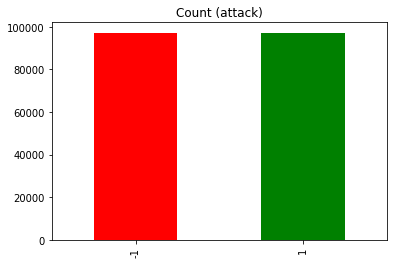

In [193]:
from matplotlib import pyplot as plt
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
df_test_under.attack.value_counts().plot(kind='bar', title='Count (attack)',  color=my_colors);
plt.show()